In [7]:
%%writefile PIT.py
import math
import meep as mp
from meep import mpb

num_bands = 3

k_points = [mp.Vector3(0.0  ,0.5  ,0.5  ),
            mp.Vector3(0.0  ,0.625,0.375),       
            mp.Vector3(0.0  ,0.5  ,0.0  ),  
            mp.Vector3(0.0  ,0.0  ,0.0  ),
            mp.Vector3(0.0  ,0.5  ,0.5  ),
            mp.Vector3(0.25 ,0.75 ,0.5  ),
            mp.Vector3(0.375,0.75 ,0.375)]          

res0 = 16
n0 = 1.5
tol = 0.001
mesh_size = 3
L = math.sqrt(3)/4
n = math.sqrt(32)
r = 0.0725
m = mp.Medium(epsilon=n*n)

geometry = [mp.Cylinder(center=mp.Vector3(0,0,0),radius=r, material=m, height=L, axis=mp.Vector3(1,1,1)),
           mp.Cylinder(center=mp.Vector3(0.5,0,0),radius=r, material=m, height=L, axis=mp.Vector3(3,-1,-1)),
           mp.Cylinder(center=mp.Vector3(0,0.5,0),radius=r, material=m, height=L, axis=mp.Vector3(-1,3,-1)),
           mp.Cylinder(center=mp.Vector3(0,0,0.5),radius=r, material=m, height=L, axis=mp.Vector3(-1,-1,3))]

geometry_lattice = mp.Lattice(size=mp.Vector3(math.sqrt(0.5), math.sqrt(0.5),math.sqrt(0.5)),
                                 basis1=mp.Vector3(0,1,1),
                                 basis2=mp.Vector3(1,0,1),
                                 basis3=mp.Vector3(1,1,0))

k_points = mp.interpolate(9, k_points)

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=res0,
                    mesh_size = mesh_size)
#mpb.ModeSolver.optimize_grid_size()
print("Square lattice of rods: TE bands")
ms.run()

Overwriting PIT.py


In [8]:
!python PIT.py >& PI.out

In [9]:
!rm PI.dat
!grep freqs PI.out >> PI.dat

In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=3
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])
        

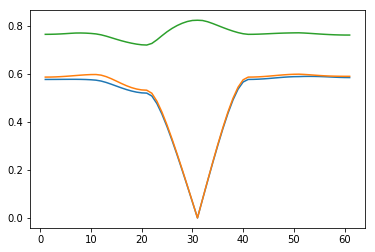

In [11]:
N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

plt.plot(nip,omega[:,:])

In [6]:
k

array([[0.    , 0.5   , 0.5   ],
       [0.    , 0.5125, 0.4875],
       [0.    , 0.525 , 0.475 ],
       [0.    , 0.5375, 0.4625],
       [0.    , 0.55  , 0.45  ],
       [0.    , 0.5625, 0.4375],
       [0.    , 0.575 , 0.425 ],
       [0.    , 0.5875, 0.4125],
       [0.    , 0.6   , 0.4   ],
       [0.    , 0.6125, 0.3875],
       [0.    , 0.625 , 0.375 ],
       [0.    , 0.6125, 0.3375],
       [0.    , 0.6   , 0.3   ],
       [0.    , 0.5875, 0.2625],
       [0.    , 0.575 , 0.225 ],
       [0.    , 0.5625, 0.1875],
       [0.    , 0.55  , 0.15  ],
       [0.    , 0.5375, 0.1125],
       [0.    , 0.525 , 0.075 ],
       [0.    , 0.5125, 0.0375],
       [0.    , 0.5   , 0.    ],
       [0.    , 0.45  , 0.    ],
       [0.    , 0.4   , 0.    ],
       [0.    , 0.35  , 0.    ],
       [0.    , 0.3   , 0.    ],
       [0.    , 0.25  , 0.    ],
       [0.    , 0.2   , 0.    ],
       [0.    , 0.15  , 0.    ],
       [0.    , 0.1   , 0.    ],
       [0.    , 0.05  , 0.    ],
       [0.